In [7]:
# huggingface login to download model
from huggingface_hub import notebook_login
notebook_login()

In [11]:
!pip install --upgrade diffusers transformers accelerate scipy


  Using cached transformers-4.25.1-py3-none-any.whl (5.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 kB 4.2 MB/s eta 0:00:006.8 MB/s eta 0:00:01
  Using cached scipy-1.9.3-cp39-cp39-macosx_12_0_arm64.whl (28.6 MB)
  Attempting uninstall: transformers
    Found existing installation: transformers 4.24.0
    Uninstalling transformers-4.24.0:
      Successfully uninstalled transformers-4.24.0


In [14]:
!pip install ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.5 MB/s eta 0:00:00


In [16]:
!pip install accelerate

In [22]:
# make sure you're logged in with `huggingface-cli login`
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

# pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
# pipe = pipe.to("mps")

model_id = "stabilityai/stable-diffusion-2"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)

# Recommended if your computer has < 64 GB of RAM
pipe.enable_attention_slicing()


'HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /stabilityai/stable-diffusion-2/resolve/main/scheduler/scheduler_config.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x1370c1670>, 'Connection to huggingface.co timed out. (connect timeout=10)'))' thrown while requesting HEAD https://huggingface.co/stabilityai/stable-diffusion-2/resolve/main/scheduler/scheduler_config.json
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Fetching 12 files:  25%|█████████▊                             | 3/12 [00:03<00:10,  1.17s/it]
Downloading:   0%|                                                 | 0.00/681M [00:00<?, ?B/s]
Downloading:   0%|                                        | 1

In [18]:

prompt = "a photo of an astronaut riding a horse on mars"

# First-time "warmup" pass (see explanation above)
_ = pipe(prompt, num_inference_steps=1)

# Results match those from the CPU device after the warmup pass.
image = pipe(prompt).images[0]

100%|███████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.40s/it]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
100%|█████████████████████████████████████████████████████████| 51/51 [02:33<00:00,  3.02s/it]


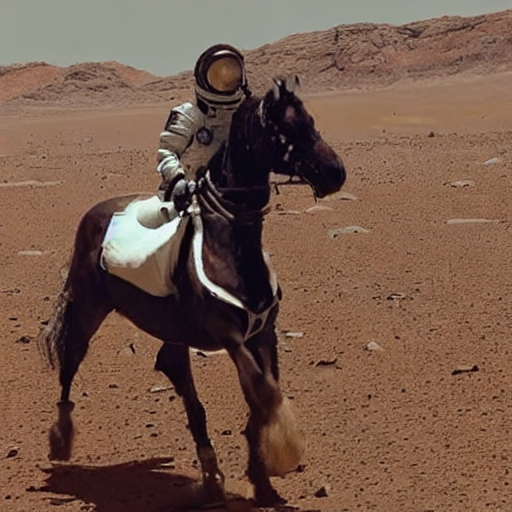

In [19]:
image